In [1]:
import numpy as np
import pandas as pd
import re
import jieba

In [2]:
#选出news_detail这一列中带有日期的数据，并存到somecolumns.csv文件中
def loop_all_rows(rows):
    for i in range(rows):
    #for i in range(3):
        one_news_detail = news['news_detail'][i]
        #print(type(str(one_news_detail)))
        one_news_detail = str(one_news_detail)
        find_date = findDate(one_news_detail)
        if find_date:
            writeSomeColumnsToCSV(i, news['stk_name'][i], find_date)


In [3]:
def writeSomeColumnsToCSV(index, stk_name, date):
    with open ('somecolumns.csv', 'a+') as f:
        #print(index, stk_name, date)
        select_csv = str(index) + ',' + str(stk_name) + ',' + date + '\n'
        f.write(select_csv)


In [4]:
def findDate(string):
    pattern = '\d+月\d+日'
    c = re.findall(pattern=pattern, string=string)
    try:
        return c[0]
    except IndexError:
        pass
a = findDate('hdhl06月0888日')
#a = findDate('hnishii')
print(a)

06月0888日


In [5]:
news = pd.read_csv('爬取的新闻0609.csv')
#print(news.head())
#print(news['news_detail'])
shape = news.shape
print(shape)
rows = shape[0]
loop_all_rows(rows)
    

(1199, 12)


In [6]:
#根据日期对数据进行聚类
select_news = pd.read_csv('somecolumns.csv')
print(select_news.head(4))
import matplotlib.pyplot as plt


   id stk_name   日期:
0   2      新国都  6月8日
1   3      博迈科  6月8日
2   4     恒力股份  6月8日
3   5     万润科技  6月8日


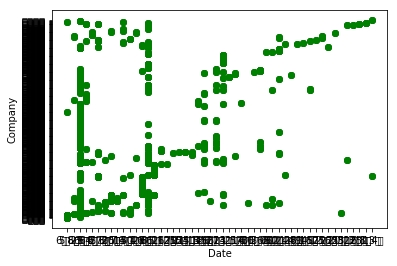

In [7]:
def plot(select_news):
    x = select_news['日期:']
    y = select_news['stk_name']
    plt.scatter(x, y, color='g')
    plt.xlabel('Date')
    plt.ylabel('Company')
    #xlim((xmin='4月1日', xmax='8月1日'))
    plt.show()
plot(select_news)


In [8]:
#df=select_news.set_index(['id'], inplace=True)
concat_news_and_select_news = pd.concat([news, select_news], axis=1, join='inner')
print(concat_news_and_select_news.shape)
print(concat_news_and_select_news.head(3))
with open ('select_news_from_origin.csv', 'w') as f:
    f.write(str(concat_news_and_select_news))

(1199, 15)
      id                                           stk_code  \
0  36809                                          002081.SZ   
1      ↵  摘要我们认为只有在长期下跌趋势中仍保持上涨且区间涨幅超过中位数或在中期下跌趋势中经过短期多次...   
2  36810                                          300130.SZ   

                                            stk_name  \
0                                                金螳螂   
1  摘要我们认为只有在长期下跌趋势中仍保持上涨且区间涨幅超过中位数或在中期下跌趋势中经过短期多次...   
2                                                新国都   

                    news_title news_roundup news_detail begin_date end_date  \
0    安信策略陈果：那些“现象级”的逆势股是如何诞生的？          NaN         NaN        NaN      NaN   
1                       6/8/19      8/20/19           6   whatever   6/8/19   
2  新国都股东江汉拟减持股份 该公司去年利润增长245%↵   6月8日消息，新国都  6月8日消息，新国都     6/8/19  8/20/19   

   news_catalog    source etldate   times_stamp  id stk_name   日期:  
0           NaN       NaN     NaN           NaN   2      新国都  6月8日  
1  6/8/19 15:17       NaN     NaN           NaN   3     

In [9]:
date_columns = concat_news_and_select_news['日期:']
#print(concat_news_and_select_news.columns)
def convert_date(date_columns):
    #print(type(date_columns), date_columns.head())
    for i, date in enumerate(date_columns):
        split_date = re.split("月|日|'\\'|'\/'", date)
        date_columns[i] = str(split_date[0]) + '-' + str(split_date[1])
    #print(type(date_columns), date_columns.head()) 
    return date_columns
concat_news_and_select_news['日期:'] = convert_date(date_columns)


In [46]:


# #concat_news_and_select_news['日期:'] = pd.to_datetime(concat_news_and_select_news['日期:'])
print(type(concat_news_and_select_news['日期:']))
#print(concat_news_and_select_news.columns)
print(concat_news_and_select_news['news_detail'].head(5))

date_6_8 = concat_news_and_select_news.loc[lambda concat_news_and_select_news: concat_news_and_select_news['日期:']=='6-8', :]
#print(date_6_8.head())
print(date_6_8.shape)
date_6_8.to_csv('date_6_8.csv', sep=',', header=True, index=True)

    

<class 'pandas.core.series.Series'>
0           NaN
1             6
2    6月8日消息，新国都
3    6月8日消息，博迈科
4    6月8日消息，恒力股
Name: news_detail, dtype: object
(35, 15)


In [25]:

def split_content(content):
    global content_S
    content_S = []
    
    for line in content:
        #print(line)
        current_segment = jieba.lcut(line)
        #print('current_segment:', current_segment)
        #if len(current_segment) > 1 and current_segment != '\r\n': #换行符
        #if len(current_segment) > 1 :
        content_S.append(current_segment)
    #print(content_S)
    #return content_S

In [26]:
#date_6_8.dropna()
#date_6_8.iloc[1:2]['news_detail'] = '6月8日'
date_6_8 = pd.read_csv('date_6_8.csv', 
                        encoding='utf-8')
# names=['id', 'stk_cod','stk_name',
#                              'news_title','news_roundup',
#                              'news_detail','begin_date',
#                              'end_date','news_catalog',
#                              'source', 'etldate',
#                              'times_stamp','id',
#                              'stk_name','日期'],
#date_6_8 = date_6_8.reset_index()
#print(date_6_8.columns)
#print(date_6_8.head(3))
#print(date_6_8['news_detail'][:5])
#a = str(date_6_8['news_detail'])
a = date_6_8['news_detail'].astype(str)
b = date_6_8['id'].astype(str)
c = list(zip(b, a))
#b = pd.DataFrame({'id':date_6_8['id'], 'news_detail':date_6_8['news_detail'].astype(str),columns=['id','news_detail']})
d = pd.DataFrame(c, columns=['id','news_detail'])
#print(d)
content = d['news_detail'].tolist()
print(len(content))
#print(content[:1])
split_content(content)
news_detail_split = pd.Series(content_S).astype(str)
#print(news_detail_split)
d['news_detail_split'] = news_detail_split
d.to_csv('date_6_8_split.csv', sep=',', encoding='utf-8', header=True, index=True)



35


In [27]:
#content_S[20]
df_content = pd.DataFrame({'content_S': content_S})
df_content['id'] = d['id']
print(df_content.tail())
print(df_content.shape)

                                            content_S     id
30  [美债, 利率, 倒挂, ，, 国内, 债市, 向, 好, —, —, 海通, 债券, 每周...  37659
31  [美债, 利率, 倒挂, ，, 国内, 债市, 向, 好, —, —, 海通, 债券, 每周...  37660
32  [【, 证券, 】, 证券, 行业, 并购, 重组, 深度, 报告, ：, 勇立, 潮头, ...  37661
33  [【, 证券, 】, 证券, 行业, 并购, 重组, 深度, 报告, ：, 勇立, 潮头, ...  37662
34  [【, 证券, 】, 证券, 行业, 并购, 重组, 深度, 报告, ：, 勇立, 潮头, ...  37663
(35, 2)


In [40]:
stopwords = pd.read_csv(r'/Users/jw/Projects/jiqixuexisuanfa_tanbingfeng/20190612算法周工作安排/stopwords/stopwords.txt',sep='\t',quoting=3, names=['stopword'],encoding='utf-8')
print(stopwords.head(10))

  stopword
0        !
1        "
2        #
3        $
4        %
5        &
6        '
7        (
8        )
9        *


In [41]:
def drop_stopwords(contents,stopwords):
    contents_clean = []
    #all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            #all_words.append(str(word))
        contents_clean.append(line_clean)
    #return contents_clean,all_words
    return contents_clean
    #print (contents_clean)
        

In [42]:
contents = df_content.content_S.values.tolist()    
stopwords = stopwords.stopword.values.tolist()
contents_clean = drop_stopwords(contents,stopwords)
print(len(contents_clean))
#print(contents_clean)
#d['news_detail_clean'] = pd.Series(contents_clean).astype(str)
d['news_detail_clean'] = pd.Series(contents_clean).astype(list)
d.to_csv('date_6_8_split_clean.csv', sep=',', encoding='utf-8', header=True, index=True)


35


In [240]:
# def convert_list_to_Series(list):
#     for i in contents_clean:
#         try:
#print(pd.Series((i for i in contents_clean)))
df_content['content_S'] = pd.Series((i for i in contents_clean))
print(df_content.head())

  content_S     id news_detail
0     [nan]  36809       [nan]
1        []      ↵          []
2      [新国]  36810        [新国]
3     [博迈科]  36811       [博迈科]
4   [恒力, 股]  36812     [恒力, 股]


In [206]:
import jieba.analyse
def extract_keywords(contents_clean):
    contents_clean_extract = []
    for line in contents_clean:
        line_str = "".join(line)           
        #extract_line_str = "  ".join(jieba.analyse.extract_tags(line_str, topK=10, withWeight=False))
        extract_line = jieba.analyse.extract_tags(line_str, topK=7, withWeight=False)        
        contents_clean_extract.append(extract_line)
    return contents_clean_extract

In [278]:
#print(contents_clean)
contents_clean_extract = extract_keywords(contents_clean)
# print(contents_clean_extract[:10])
print(len(contents_clean_extract))
df_content['content_S'] = pd.Series((i for i in contents_clean_extract))
#df_content.to_csv('contents_clean_extract.csv', sep=',', header=True, index=True)
print(df_content.head())

35
  content_S     id news_detail
0     [nan]  36809       [nan]
1        []      ↵          []
2      [新国]  36810        [新国]
3     [博迈科]  36811       [博迈科]
4      [恒力]  36812     [恒力, 股]


In [125]:
#获得词库，传入格式为list of list
def get_seg_list(contents_clean_extract):
    seg_list = []
    for i in contents_clean_extract:
        seg_list += i
    return list(set(seg_list))        

In [126]:
#seg_list为词库， str_list为需要转化为向量的list
def onehotlist_a(seg_list, str_list):
    onehot_list = []
    for i in seg_list:
        if i in str_list:
            onehot_list.append(1)
        else:
            onehot_list.append(0)
    return(onehot_list)

In [127]:
def onehotlists(seg_list, contents_clean_extract):
    onehot_lists = []
    for i in contents_clean_extract:
        onehot_list = onehotlist_a(seg_list, i)
        #print(onehot_list, '\t')
        onehot_lists.append(onehot_list)
    print(len(onehot_lists))
    return onehot_lists

In [129]:
contents_clean_extract = pd.read_csv('date_6_8_split_clean.csv', sep=',',
                        encoding='utf-8') 
#onehot_lists = onehotlists(get_seg_list(contents_clean_extract), contents_clean_extract)
#print(onehot_lists)

### cos distance

In [123]:

from scipy.spatial.distance import pdist
def compute_cos_distance(onehot_lists):
    distance_list = []
    index_list = []
    for i in range(len(onehot_lists)-1):    
        for j in range(1, len(onehot_lists)):
            distance = pdist(np.vstack([onehot_lists[i], onehot_lists[j]]), 'cosine')[0]
            distance_list.append(distance)
            index_str = '索引 %d 与索引 %d 之间的余弦距离为:' % (i, j)
            index_list.append(index_str)
    #return dict(zip(index_list, distance_list))
    


In [130]:
compute_cos_distance(onehot_lists)


### LDA

In [5]:

from gensim import corpora, models, similarities
import gensim

In [8]:
import ast
def convert_listofstr_to_listoflist(list_of_str):    
    list_of_list = []
    for i in list_of_str:
        i = ast.literal_eval(i)
        list_of_list.append(i)
    return list_of_list
convert_listofstr_to_listoflist(['[1,2,3]', '[4,5,6]'])

[[1, 2, 3], [4, 5, 6]]

In [7]:
date_6_8_split_clean = pd.read_csv('date_6_8_split_clean.csv', sep=',',
                        encoding='utf-8')
#news_detail_split_clean = date_6_8_split_clean['news_detail_clean'].values.tolist()
news_detail_split_clean = date_6_8_split_clean['news_detail_clean'].values.tolist()

news_detail_split_clean_1 = convert_listofstr_to_listoflist(news_detail_split_clean)

#news_detail_split_clean = date_6_8_split_clean['news_detail_clean']
#print(news_detail_split_clean.head(20))



In [8]:
# print(news_detail_split_clean_1)
# print(len(news_detail_split_clean_1))

In [9]:
#dictionary = corpora.Dictionary([['30'],['45'],['30']])
#print(news_detail_split_clean_1)
#print(news_detail_split_clean_1[:8])
dictionary = corpora.Dictionary(news_detail_split_clean_1)
print(dictionary)
# for key, value in dictionary.items():
#     print(key, value)
#print(dictionary['9'])
# for i in dictionary.keys():
#     print(i)

#[(1, 1)]
corpus = [dictionary.doc2bow(sentence) for sentence in news_detail_split_clean_1]
print(corpus[-1][-1])
print(corpus[:15])
#(1698, 2)表示dictionary中最后一个词，在最后一篇文章里出现了2次



# for i,sentence in enumerate(news_detail_split_clean_1):
#     if i == 0 or 1 or 2:
#         #print(sentence)
#         pass

Dictionary(1699 unique tokens: ['nan', '新国', '博迈科', '恒力', '股']...)
(1698, 2)
[[(0, 1)], [], [(1, 1)], [(2, 1)], [(3, 1), (4, 1)], [(5, 1)], [(6, 1)], [(6, 1), (7, 1)], [(8, 1), (9, 1), (10, 1)], [(8, 1), (9, 1), (10, 1)], [(8, 1), (9, 1), (10, 1)], [(8, 1), (9, 1), (10, 1)], [(8, 1), (9, 1), (10, 1)], [(8, 1), (9, 1), (10, 1)], [(8, 1), (9, 1), (10, 1)]]


In [10]:
# dictionary = corpora.Dictionary([["nan"], [''], ['新国'], ["博迈科"], ['恒力', '股'], ["万润科"], ["近日"], ['近日', '庄']])
# print(dictionary)

In [11]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10)

In [12]:
for i,j in enumerate(lda.get_document_topics(corpus)):
    if i >25:
        print(j)
# [(6, 0.9977213)]
# [(6, 0.9977213)]
# [(6, 0.9977213)]
#从后3篇文章可以看出，这3篇文章属于第6个主题的概率接近，所以可以将这3篇文章归为同一类


[(0, 0.09381683), (5, 0.15366454), (8, 0.7519366)]
[(0, 0.07708649), (5, 0.17218663), (8, 0.7501449)]
[(0, 0.08787497), (5, 0.15905577), (8, 0.7524873)]
[(0, 0.0626001), (5, 0.15017141), (8, 0.7866465)]
[(0, 0.091842346), (5, 0.14436981), (8, 0.7632059)]
[(0, 0.111396044), (5, 0.1680325), (8, 0.7199895)]
[(2, 0.32623544), (9, 0.671739)]
[(2, 0.3187889), (9, 0.6791855)]
[(2, 0.34810203), (9, 0.64987236)]


### simhash

In [13]:
date_6_8_split_clean = pd.read_csv('date_6_8_split_clean.csv', sep=',',
                        encoding='utf-8')
news_detail_split_clean = date_6_8_split_clean['news_detail_clean'].values.tolist()
news_detail_split_clean_1 = convert_listofstr_to_listoflist(news_detail_split_clean)
#print(news_detail_split_clean_1)


In [14]:
def calculate_idf(news_detail_split_clean_1):
    doc_num = len(news_detail_split_clean_1)
    idf_listoflist = []
    for doc in news_detail_split_clean_1:
        idf_single_doc = []
        for word in doc:
            doc_content_word_num = 0
            for doc in news_detail_split_clean_1:
                if word in doc:
                    doc_content_word_num += 1
            idf_single_doc.append(doc_content_word_num/doc_num)  
        idf_listoflist.append(idf_single_doc)
    return idf_listoflist

In [15]:
calculate_idf = calculate_idf(news_detail_split_clean_1)
print(len(calculate_idf))

35


In [16]:
def calculate_tf(news_detail_split_clean_1):
    tf_listoflist = []
    for doc in news_detail_split_clean_1:
        doc_len = len(doc)
        single_doc_content_word_nums = []
        for word in doc:
            single_doc_content_word_num = 0
            for word_again in doc:                
                if word == word_again:
                    single_doc_content_word_num +=1
            single_tf = single_doc_content_word_num/doc_len
            single_doc_content_word_nums.append(single_tf)
        tf_listoflist.append(single_doc_content_word_nums)
    return tf_listoflist

In [17]:
calculate_tf = calculate_tf(news_detail_split_clean_1)
print(len(calculate_tf))

35


In [22]:
def multi_listoflist(list1, list2):
    list3 = []
    for i, ratio in enumerate(list1):
        muti_list = list(map(lambda a,b:a*b*1000, ratio, list2[i]))
        list3.append(muti_list)
    return list3

In [19]:
multi_listoflist([[1,2,3], [1,2,3]], [[4,5,6],[4,5,6]])

[[4, 10, 18], [4, 10, 18]]

In [24]:
tf_idf_listoflist = multi_listoflist(calculate_idf,calculate_tf)
print(len(tf_idf_listoflist))
#print(tf_idf_listoflist)

35


In [25]:
def generate_dic_for_keyword_weight(listoflist_keyword, listoflist_weight):
    doc_weight_dict = []
    for i, doc in enumerate(listoflist_keyword):
        single_doc_weight_dict = dict(zip(doc, listoflist_weight[i]))
        doc_weight_dict.append(single_doc_weight_dict)
    return doc_weight_dict
    

In [27]:
generate_dic_for_keyword_weight = generate_dic_for_keyword_weight(news_detail_split_clean_1, tf_idf_listoflist)
print(len(generate_dic_for_keyword_weight))
print(generate_dic_for_keyword_weight[:5])

35
[{'nan': 28.57142857142857}, {}, {'新国': 28.57142857142857}, {'博迈科': 28.57142857142857}, {'恒力': 14.285714285714285, '股': 57.14285714285714}]


In [32]:
def getBinStr(source):
        if source == "":
            return 0
        else:
            x = ord(source[0]) << 7
            m = 1000003
            mask = 2 ** 128 - 1
            for c in source:
                x = ((x * m) ^ ord(c)) & mask
            x ^= len(source)
            if x == -1:
                x = -2
            x = bin(x).replace('0b', '').zfill(64)[-64:]
            #print(source, x, len(x))
            return str(x)

In [74]:
#合并
def sum_listoflist(listoflist):
    try:
        sumlistoflist = list(np.sum(listoflist, axis=0))
    except TypeError:
        sumlistoflist = []
    return sumlistoflist

In [77]:
sum_listoflist([[1,2],[3,4]])
#sum_listoflist([])

[4, 6]

In [6]:
#降维
def convert_onezero_listoflist(listoflist):
    onezero_doc = []
    for doc in listoflist:
        single_onezero_doc = []
        for word in doc:
            try:
                if word > 0:
                    single_onezero_doc.append(1)
                elif word <= 0:
                    single_onezero_doc.append(0)
                else:
                    pass
            except TypeError:
                pass
        onezero_doc.append(single_onezero_doc)
    return onezero_doc       

In [116]:
convert_onezero_listoflist([[1,2],[]])
a = [[-29, 29, -29, -29, 29,
      -29, -29, 29, -29, -29, 
      -29, -29, -29, -29, 29,
      29, -29, -29, 29, 29, -29,
      -29, -29, -29, 29, -29, -29,
      -29, -29, 29, -29, 29, 29,
      -29, 29, -29, 29, 29, -29, 29,
      29, -29, 29, -29, 29, 29, -29,
      29, 29, -29, 29, 29, -29, 29,
      29, 29, 29, -29, 29, -29, 29, 29, -29, -29], []]
#convert_onezero_listoflist(a)

In [133]:
import math
def simhash(keyword_weight_listoflist):
    doc_weight = []
    for doc in keyword_weight_listoflist:
        single_doc_weight = []
        for key, weight in doc.items():
            single_word_weight = []
            key_bin = getBinStr(key)
            weight = math.ceil(weight)
            for i in key_bin:
                if int(i) == 1:
                    single_word_weight.append(weight)
                else:
                    single_word_weight.append(-weight)
            single_doc_weight.append(single_word_weight)
        single_doc_weight = sum_listoflist(single_doc_weight)
        #不可以在里面调用
        #single_doc_weight = convert_onezero_listoflist(single_doc_weight)
        doc_weight.append(single_doc_weight)
    return doc_weight
                    

In [134]:
simhash = simhash(generate_dic_for_keyword_weight)
onezero_simhash = convert_onezero_listoflist(simhash)
print(len(onezero_simhash))
#print(onezero_simhash)

35


In [135]:
#16位hash,分4段存储

In [139]:
def get_distance(hashstr1, hashstr2):
    distance = 0
    for i ,hash_value in enumerate(hashstr1):        
        if hash_value != hashstr2[i]:
            distance += 1
    return distance

In [144]:
ditance1 = get_distance(onezero_simhash[-1], onezero_simhash[-4])
ditance2 = get_distance(onezero_simhash[-1], onezero_simhash[-2])
ditance3 = get_distance(onezero_simhash[-1], onezero_simhash[-3])
print(ditance1, ditance2, ditance3)
#最后3篇文章的相似性比较大

22 0 0


### TF-IDF

In [145]:
import gensim
from gensim import corpora, models, similarities

In [146]:
date_6_8_split_clean = pd.read_csv('date_6_8_split_clean.csv', sep=',',
                        encoding='utf-8')
news_detail_split_clean = date_6_8_split_clean['news_detail_clean'].values.tolist()
news_detail_split_clean_1 = convert_listofstr_to_listoflist(news_detail_split_clean)


In [147]:
dictionary = corpora.Dictionary(news_detail_split_clean_1)
corpus = [dictionary.doc2bow(doc) for doc in news_detail_split_clean_1]

In [157]:
print(len(corpus))
#print(corpus)

35


In [148]:
tfidf = models.TfidfModel(corpus)

In [162]:
print(tfidf)

TfidfModel(num_docs=35, num_nnz=6492)


In [158]:
#与corpus相比，tfidf[corpus]第二个参数转换为对应的tfidf
print(len(list(tfidf[corpus])))
#print(list(tfidf[corpus]))

35


In [149]:
#求dictionary中键的数量
featurenum=len(dictionary.token2id.keys())

1699


In [159]:
#获得包含35个array的list,每一个array的长度都为35，表示与每篇文章的相似度
index=similarities.SparseMatrixSimilarity(tfidf[corpus],num_features=featurenum)

In [169]:
print(len(list(index)))
#获得最后一篇文章，格式为[(1, 1),(32, 5)]的稀疏向量
#last_doc = dictionary.doc2bow(doc_str1.split())
last_doc = list(tfidf[corpus])[-1]
#print(last_doc)
sim=index[last_doc]
print(sim, len(sim))
#从列表的后3列可以看出，最后3篇文章的相似度比较高

35
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.07750698 0.07750698
 0.02903054 0.04980978 0.02965285 0.02965285 0.06724788 0.01596437
 0.30073586 0.30073586 0.03305477 0.03305477 0.03305477 0.03305477
 0.03305477 0.03305477 0.99999774 0.99999774 0.99999774] 35


### doc2vec

In [20]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
print (type(common_texts))
print(common_texts)
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
print(documents)
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)


<class 'list'>
[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]
[TaggedDocument(words=['human', 'interface', 'computer'], tags=[0]), TaggedDocument(words=['survey', 'user', 'computer', 'system', 'response', 'time'], tags=[1]), TaggedDocument(words=['eps', 'user', 'interface', 'system'], tags=[2]), TaggedDocument(words=['system', 'human', 'system', 'eps'], tags=[3]), TaggedDocument(words=['user', 'response', 'time'], tags=[4]), TaggedDocument(words=['trees'], tags=[5]), TaggedDocument(words=['graph', 'trees'], tags=[6]), TaggedDocument(words=['graph', 'minors', 'trees'], tags=[7]), TaggedDocument(words=['graph', 'minors', 'survey'], tags=[8])]


In [55]:
date_6_8_split_clean = pd.read_csv('date_6_8_split_clean.csv', sep=',',
                        encoding='utf-8')
news_detail_split_clean = date_6_8_split_clean['news_detail_clean'].values.tolist()
news_detail_split_clean_1 = convert_listofstr_to_listoflist(news_detail_split_clean)
print(type(news_detail_split_clean_1))
print(news_detail_split_clean_1[:12])

<class 'list'>
[['nan'], [], ['新国'], ['博迈科'], ['恒力', '股'], ['万润科'], ['近日'], ['近日', '庄'], ['摘要', '失落', '地产股'], ['摘要', '失落', '地产股'], ['摘要', '失落', '地产股'], ['摘要', '失落', '地产股']]


In [42]:
# 注意i后面有中括号
documents = [TaggedDocument(doc ,[i]) for i, doc in enumerate(news_detail_split_clean_1)]
print(documents[:2])
print(len(documents))
# for i in documents:
#     print(i.tags)
#print(documents.tags())


[TaggedDocument(words=['nan'], tags=[0]), TaggedDocument(words=[], tags=[1])]
35


In [51]:
#少于min_count次数的单词会被丢弃掉
model_dm = Doc2Vec(documents, vector_size=5, windows=2, min_count=1, workers=1)
#print(model.corpus_count)
model_dm.train(documents, total_examples=model_dm.corpus_count, epochs=10)


In [59]:
inferred_vector_dm = model_dm.infer_vector(news_detail_split_clean_1[-1])
print (inferred_vector_dm)
sims = model_dm.docvecs.most_similar([inferred_vector_dm], topn=5)
print(sims)
#可以看出32 33 34条新闻，即后3条新闻的相似性比较大

[-4.0679297  4.360374  -2.0655031 -5.0215907  6.6757684]
[(32, 0.938827633857727), (33, 0.9098161458969116), (24, 0.9009076952934265), (5, 0.8971340656280518), (34, 0.8803019523620605)]


### Bert